## 銭湯の蛇口問題

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark", {'grid.linestyle': '--'})

## バネの振動
単純な三角関数のグラフ

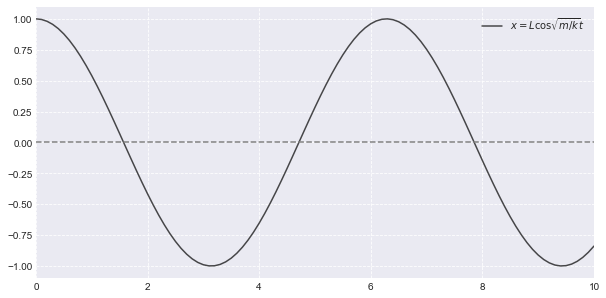

In [2]:
m = 1 #質量
k = 1 #ばね定数
L = 1 #振幅
def x(t,m,k,L):
    return L*np.cos(np.sqrt(m/k)*t)
t = np.linspace(0,10,101)
plt.figure(figsize=(10,5))
plt.plot(t,x(t,m,k,L),color="black",alpha=0.7,label="$x=L\cos{\sqrt{m/k}t}$")
plt.plot([0,10],[0,0],"--",color="gray")
plt.legend()
plt.xlim(0,10)
plt.grid()
plt.savefig("figures/2-1_cos.pdf")

## LungeKutta
y' = f(x,y)のy
dx/dt = -x

In [3]:
class LungeKutta:
    def __init__(self,f,t_init,t_finish,x_init, dt):
        self.n = int((t_finish-t_init)/dt) # 刻み幅
        self.t = t_init
        self.dt = dt
        self.f = f
        self.x = x_init
        self.xs = [x_init]
        self.ts = [t_init]
        
    def update(self):
        """
        始点と終点まで時間更新を続ける
        """
        for i in range(self.n):
            k1 = self.dt * self.f(self.x, self.t)
            k2 = self.dt * self.f(self.x + 0.5*k1, self.t+0.5*self.dt)
            k3 = self.dt * self.f(self.x + 0.5*k2, self.t+0.5*self.dt)
            k4 = self.dt * self.f(self.x + k3, self.t + self.dt)
            self.x += (k1 + 2*k2 + 2*k3 + k4) / 6
            self.t += self.dt
            self.xs.append(self.x)
            self.ts.append(self.t)
        print("Finish")
        
    def drawing(self):
        plt.figure(figsize=(5,5))
        plt.xlim(self.ts[0], self.ts[-1])
        plt.plot(self.ts,self.xs, color="black", alpha=0.7)
        plt.grid()

Finish


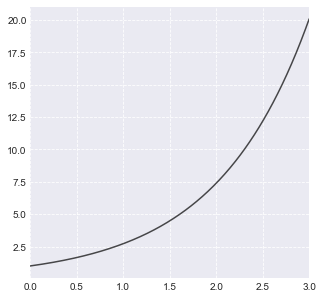

In [4]:
def f(x,t):
    """
    微分方程式 df/dx = x
    """
    return x

t_init = 0
t_finish = 3
x_init = 1
dt = 0.01
LK = LungeKutta(f,t_init,t_finish,x_init, dt)
LK.update()
LK.drawing()

## Delayed Runge-Kutta
RungeKuttaを時間遅れ微分方程式用に改造

In [5]:
class DelayedRungeKutta:
    def __init__(self,f,t_init,t_finish,x_init,t_delay, dt):
        self.n = int((t_finish-t_init)/dt) #試行回数
        self.t = t_init #時間初期値
        self.x = x_init #x初期値
        self.dt = dt #幅
        self.f = f #関数
        self.xs = [x_init] # xグラフ用
        self.ts = [t_init] # tグラフ用
        # 時間遅れ用buffer(t_delay>=dt)
        self.n_delay = int(t_delay/dt)
        self.x_buffer = [x_init]*self.n_delay
        
    def update(self):
        for i in range(self.n):
            x = self. x_buffer[0]
            k1 = self.dt * self.f(x, self.t)
            k2 = self.dt * self.f(x + 0.5*k1, self.t+0.5*self.dt)
            k3 = self.dt * self.f(x + 0.5*k2, self.t+0.5*self.dt)
            k4 = self.dt * self.f(x + k3, self.t + self.dt)
            self.x += (k1 + 2*k2 + 2*k3 + k4) / 6
            # buffer更新
            buffer = self.x_buffer[1:]
            buffer.append(self.x)
            self.x_buffer = buffer
            self.t += self.dt
            self.ts.append(self.t)
            self.xs.append(self.x)
        print("Finish Updating")
        
    def drawing(self):
        plt.xlim(self.ts[0], self.ts[-1])
        plt.plot(self.ts,self.xs, color="black", alpha=0.7)


## 時間遅れと温度の振動具合
時間遅れごとにプロット(RungeKuttaを用いる)

Finish Updating
Finish Updating
Finish Updating


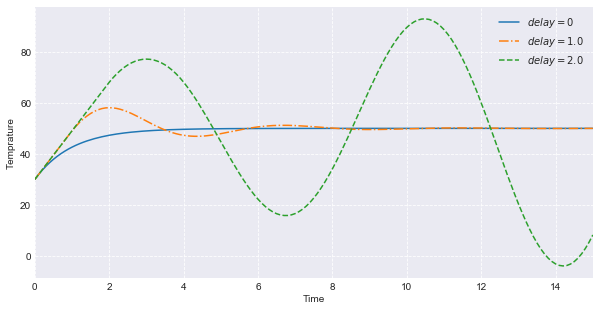

In [6]:

def g(x,t):
    return -1*(x-50)

t_init = 0
t_finish = 15
x_init = 30
t_delay = 0.1
dt = 0.1
plt.figure(figsize=(10,5))
# nodelay
DRK = DelayedRungeKutta(g,t_init,t_finish,x_init,t_delay, dt)
DRK.update()
plt.plot(DRK.ts,DRK.xs,label="$delay = 0$",linestyle="-")
t_delay = 1
DRK = DelayedRungeKutta(g,t_init,t_finish,x_init,t_delay, dt)
DRK.update()
plt.plot(DRK.ts,DRK.xs,label="$delay = 1.0$",linestyle="-.")
# delay
t_delay = 2
DRK = DelayedRungeKutta(g,t_init,t_finish,x_init,t_delay, dt)
DRK.update()
plt.plot(DRK.ts,DRK.xs,label="$delay = 2.0$",linestyle="--")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Temprature")
plt.xlim(DRK.ts[0], DRK.ts[-1])
plt.grid()
plt.savefig("figures/2-2_delay.pdf")


## 「賢さ」で、振動を抑える
- 時間を追うごとに、調整幅を減らしていく手法

Finish Updating
Finish Updating


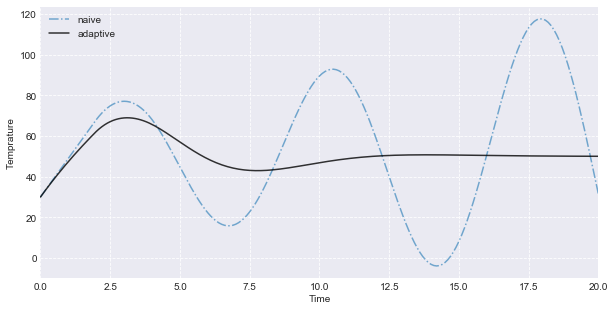

In [7]:
def g_adjust(x,t):
    return -1/(dt*2*t+1)*(x-50)

plt.figure(figsize=(10,5))
t_init = 0
t_finish = 20

# delay
t_delay = 2
DRK = DelayedRungeKutta(g,t_init,t_finish,x_init,t_delay, dt)
DRK.update()
plt.plot(DRK.ts,DRK.xs,label="naive",linestyle="-.",alpha=0.6)

# delay (adjust)
DRK = DelayedRungeKutta(g_adjust,t_init,t_finish,x_init,t_delay, dt)
DRK.update()
plt.plot(DRK.ts,DRK.xs,label="adaptive",color="black",alpha=0.8)

plt.legend()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Temprature")
plt.xlim(DRK.ts[0], DRK.ts[-1])
plt.savefig("figures/2-3_adaptive.pdf")


## おまけ : 2D Runge-Kutta
二変数の微分方程式用。コードは汚いけどとりあえず動く。
二階の微分方程式も、分解するとに変数の一回微分方程式にできるので、やってみると良い

ここではvan der Pol方程式について解く

$\frac{d^2x}{dt^2}-a(1-x^2)\frac{dx}{dt}+x=0$

リミットサイクルといい、時間が経つとその軌道上に速度と変位が落ち着く

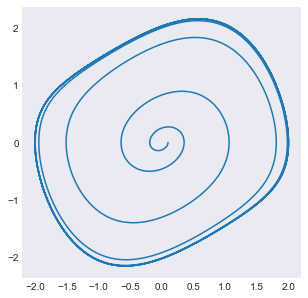

In [8]:
def f(v,t):
    return v
def g(x,v,t,a):
    return a*(1-x**2)*v-x

a = 0.4
x = 0.1
v = 0
t = 0
dt = 0.001
xs = []
vs = []
N = 50000
for i in range(N):
    g_k1 = dt * g(x,v,t,a)
    g_k2 = dt * g(x + 0.5*g_k1,v+0.5*g_k1 ,t+0.5*dt, a)
    g_k3 = dt * g(x + 0.5*g_k2,v+0.5*g_k2 ,t+0.5*dt, a)
    g_k4 = dt * g(x + g_k3, v+g_k3, t +dt ,a)
    f_k1 = dt * f(v,t)
    f_k2 = dt * f(v+0.5*f_k1,t+0.5*dt)
    f_k3 = dt * f(v+0.5*f_k2,t+0.5*dt)
    f_k4 = dt * f(v+f_k3,t+dt)

    v += (g_k1 + 2*g_k2 + 2*g_k3 + g_k4) / 6
    x += (f_k1 + 2*f_k2 + 2*f_k3 + f_k4) / 6
    t += dt
    xs.append(x)
    vs.append(v)
plt.figure(figsize=(5,5))
plt.plot(xs,vs)
